In [1]:
## import required libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
## Read dataset
data = pd.read_csv("parkinsons.csv")
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [3]:
X = data.drop(['status', 'name'], axis=1)
y = data['status']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [5]:
dtree = DecisionTreeClassifier(criterion="entropy")
dtree.fit(X_train, y_train)
e_pred = dtree.predict(X_test)
print("Accuracy score using entropy Test:", accuracy_score(y_test, e_pred), " Train:",accuracy_score(y_train, dtree.predict(X_train)))
tn, fp, fn, tp=confusion_matrix(y_test, e_pred).ravel()
print("TP TN FP FN \n",tp, tn, fp, fn)

Accuracy score using entropy Test: 0.9230769230769231  Train: 1.0
TP TN FP FN 
 31 5 2 1


In [5]:
# clf = DecisionTreeClassifier()
# clf.fit(X_train, y_train)
# e_pred = clf.predict(X_test)
# print("Accuracy score using entropy Test:", accuracy_score(y_test, e_pred), " Train:",accuracy_score(y_train, clf.predict(X_train)))
# tn, fp, fn, tp=confusion_matrix(y_test, e_pred).ravel()
# print("TP TN FP FN \n",tp, tn, fp, fn)

Accuracy score using entropy Test: 0.9230769230769231  Train: 1.0
TP TN FP FN 
 31 5 2 1


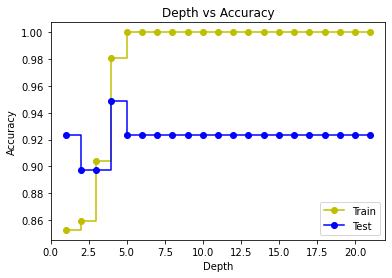

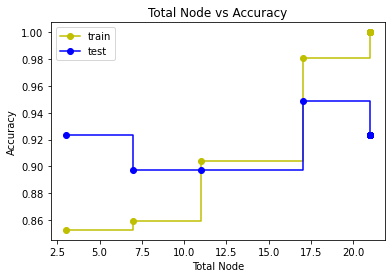

In [34]:
import matplotlib.pyplot as plt
train_accuracy = []
test_accuracy = []
depth = []
total_node = []
for j in range(1,len(X.columns)):
    model = DecisionTreeClassifier(max_depth=j, criterion='entropy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracy.append(accuracy_score(y_test, y_pred))  
    depth.append(j)
    total_node.append(model.tree_.node_count)
    
plt.plot(depth, train_accuracy, 'y', label='Train', drawstyle="steps-post", marker='o')
plt.plot(depth, test_accuracy, 'b', label='Test', drawstyle="steps-post", marker='o')
plt.title('Depth vs Accuracy')
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()  


plt.plot(total_node, train_accuracy, 'y', label="Train", drawstyle="steps-post", marker='o')
plt.plot(total_node, test_accuracy, 'b', label="Test", drawstyle="steps-post", marker='o')
plt.title('Total Node vs Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Total Node')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Number of nodes in the last tree is: 1 with ccp_alpha: 0.15018376809874784


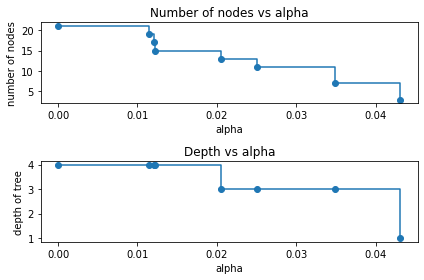

In [8]:
import matplotlib.pyplot as plt
path = dtree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
for ccp_alpha in ccp_alphas:
    dtree = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    dtree.fit(X_train, y_train)
    clfs.append(dtree)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

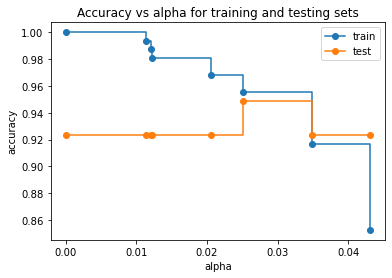

0.9487179487179487


In [10]:
train_scores = [dtree.score(X_train, y_train) for dtree in clfs]
test_scores = [dtree.score(X_test, y_test) for dtree in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()
print(np.max(test_scores))

In [4]:
# the accuracy by averaging over 10 random 80/20 splits
dataset = X.join(y).dropna().apply(np.int64)
avg10accuracy = 0.0
for i in range(10):
    msk = np.random.rand(len(dataset)) < 0.8
    train = dataset[msk]
    test = dataset[~msk]   
    X_train = train.drop(['status'], axis=1)
    y_train = train['status']
    X_test = test.drop(['status'], axis=1)
    y_test = test['status']
    X_data = X_train.join(y_train).dropna().apply(np.int64)
    dtree = DecisionTreeClassifier(criterion="entropy")
    dtree.fit(X_train, y_train)
    y_pred = dtree.predict(X_test)
    avg10accuracy += accuracy_score(y_test, y_pred)
print("Accuracy score on averaging over 10 random 80/20 splits ",avg10accuracy/10) 

Accuracy score on averaging over 10 random 80/20 splits  0.8623073360659174
